# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Cathleen Davina Hendrawan
- **Email:** 22k10020@student.unika.ac.id
- **ID Dicoding:** cathleen_davina_hendrawan

## Menentukan Pertanyaan Bisnis

- Apakah ada peningkatan penyewaan sepeda pada beberapa jam tertentu?
- Bagaimana perbedaan penyewaan sepeda di hari kerja dengan akhir pekan dan hari libur(antara casual dan registered)?
- Bagaimana prebandingan jumlah penyewaan sepeda dalam musim-musim tertentu(antara casual dan registered)?
- Bagaimana pengaruh cuaca dalam penyewaan sepeda(antara casual dan registered)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import dataset day.csv
day_df = pd.read_csv("/content/drive/MyDrive/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# import dataset hour.csv
hour_df = pd.read_csv("/content/drive/MyDrive/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

Assesing day_df dataset

In [5]:
day_df.info() #check datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- wrong data type for dteday

In [6]:
day_df.isna().sum() #check missing value
# no missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("day_df duplicate count: ", day_df.duplicated().sum()) #check duplicate
# no duplicate

day_df duplicate count:  0


In [8]:
day_df.describe() #check parameter
# none out of place

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Assesing hour_df dataset

In [9]:
hour_df.info() #check datatype
# wrong data type for dteday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum() #check missing value
# no missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("hour_df duplicate count: ", hour_df.duplicated().sum()) #check duplicate
# no duplicate

hour_df duplicate count:  0


In [12]:
hour_df.describe() #check parameter
# none out of place

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

# fix both day_df and hour_df dteday variable from object to datetime

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- dteday data type had been changed from object to datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
dayHour_df = pd.merge(
    left= hour_df,
    right= day_df,
    how="left",
    left_on="dteday",
    right_on="dteday",
    suffixes=('_hr', '_day')
)

dayHour_df.head(30) #check to see if the hour is merged
# _x for hour, _y for day

,instant_hr,dteday,season_hr,yr_hr,mnth_hr,hr,holiday_hr,weekday_hr,workingday_hr,weathersit_hr,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
6,7,2011-01-01,1,0,1,6,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
7,8,2011-01-01,1,0,1,7,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
8,9,2011-01-01,1,0,1,8,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
9,10,2011-01-01,1,0,1,9,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [17]:
dayHour_df.describe(include="all")

,instant_hr,dteday,season_hr,yr_hr,mnth_hr,hr,holiday_hr,weekday_hr,workingday_hr,weathersit_hr,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


In [18]:
dayHour_df.groupby(by="hr").agg({
    "cnt_hr" : "mean"
})
# using mean to see a relative change at different hours

,cnt_hr
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


**Insight:**
- reaches peak hours during 8 am and 18 pm
- 4 am is the lowest bike renting

In [19]:
dayHour_df.groupby(by="workingday_day").agg({
    "cnt_day" : "mean", #both casual and registered
    "casual_day" : "mean",
    "registered_day" : "mean"
})
# 0 for weekend and holiday
# 1 for working day

,cnt_day,casual_day,registered_day
workingday_day,,,
0,4341.834059,1375.189518,2966.644541
1,4622.855204,612.286136,4010.569069


**Insight:**
- registered users often rent during working day
- casual users often rent during weekend/holiday

In [20]:
dayHour_df.groupby(by="mnth_day").agg({
    "casual_day" : "mean",
    "registered_day" : "mean"
})

,casual_day,registered_day
mnth_day,,
1,200.114066,2028.256123
2,264.376585,2406.884415
3,719.733876,2989.431093
4,1013.711204,3470.707724
5,1214.274194,4135.500000
6,1231.766667,4540.600000
7,1260.596774,4303.080645
8,1164.525424,4524.713898
9,1173.768267,4598.339596


Insight:
- casual renters reaches its peak from may to sept, significant loss on dec- feb
- registered reaches peak in june, aug, sept and significant loss on jan- feb

In [21]:
dayHour_df.groupby(by="season_day").agg({
    "cnt_day" : "mean", #both casual and registered
    "casual_day" : "mean",
    "registered_day" : "mean"
})

# 1 spring
# 2 summer
# 3 fall
# 4 winter

,cnt_day,casual_day,registered_day
season_day,,,
1,2635.348185,339.582273,2295.765912
2,4995.253119,1106.982309,3888.270810
3,5654.093194,1204.153915,4449.939279
4,4765.366021,735.468100,4029.897921


Insight:
- both casual users and registered users tend to rent in fall, and less in spring

In [22]:
dayHour_df.groupby(by="weathersit_day").agg({
    "cnt_day" : "mean", #both casual and registered
    "casual_day" : "mean",
    "registered_day" : "mean"
})

# 1 clear/cuaca cerah
# 2 mist, cloudy/sedikit berawan
# 3 light snow, light rain/hujan ringan
# 4 heavy rain, ice pallets/hujan deras

# based on daily

,cnt_day,casual_day,registered_day
weathersit_day,,,
1,4895.177083,968.118388,3927.058696
2,4062.717595,692.741271,3369.976324
3,1914.700855,197.561966,1717.138889


Insight:
- both casual users and registered users tend to rent in clear weather, and less when it's raining lightly

In [23]:
dayHour_df.groupby(by="weathersit_hr").agg({
    "cnt_hr" : "mean", #both casual and registered
    "casual_hr" : "mean",
    "registered_hr" : "mean"
})
# based on hourly

,cnt_hr,casual_hr,registered_hr
weathersit_hr,,,
1,204.869272,40.545431,164.323841
2,175.165493,29.595290,145.570202
3,111.579281,16.055673,95.523608
4,74.333333,2.666667,71.666667


Insight:
- both casual users and registered users tend to rent in clear weather, and even less when it's raining heavily

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada peningkatan penyewaan sepeda pada beberapa jam tertentu?

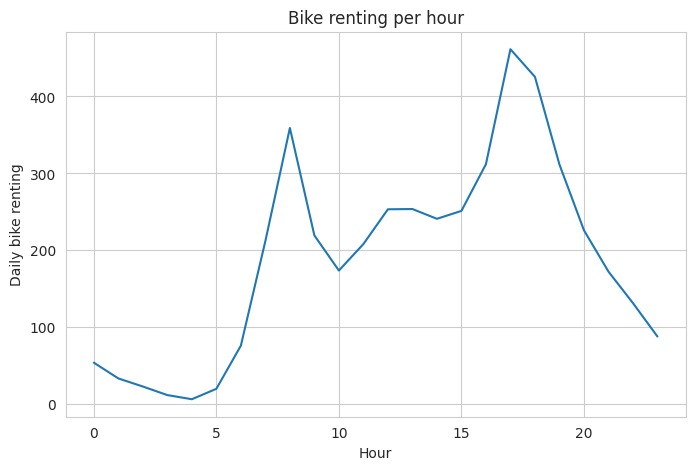

In [24]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.lineplot(x="hr", y="cnt_hr", data=dayHour_df, errorbar=None)
plt.title("Bike renting per hour")
plt.xlabel("Hour")
plt.ylabel("Daily bike renting")
plt.show()

- Ada peningkatan yang signifikan dalam penyewaan sepeda, sekitar jam 8 pagi dan jam 5 sore

### Pertanyaan 2: Bagaimana perbedaan penyewaan sepeda di hari kerja dengan akhir pekan dan hari libur? (antara casual users dengan registered users)

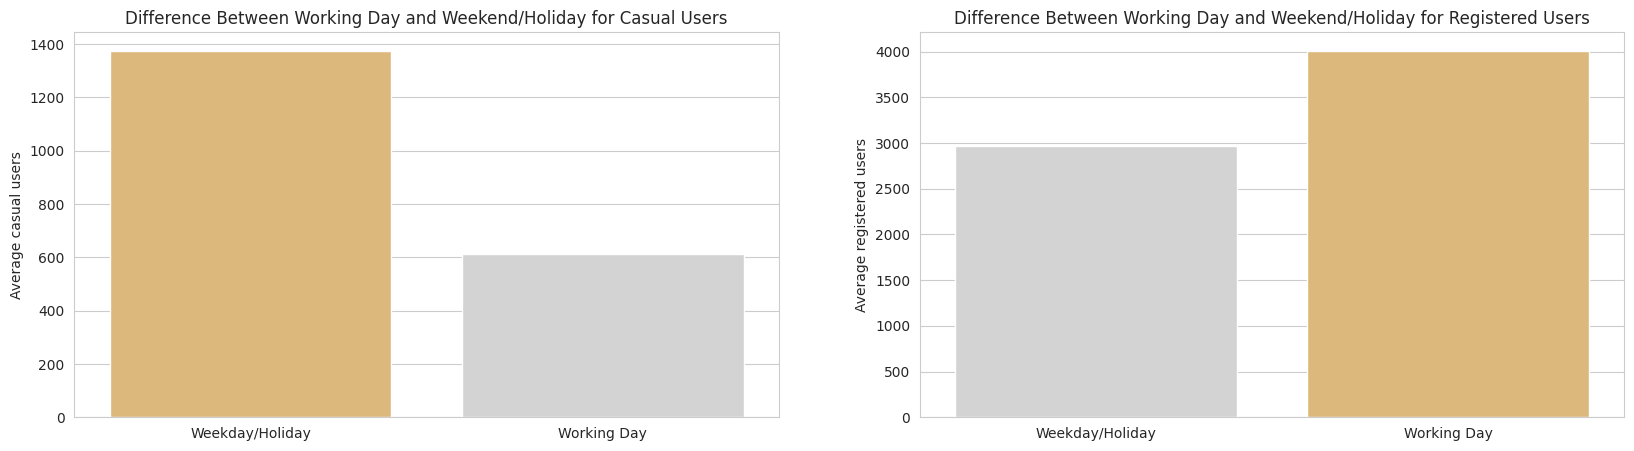

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

casualRenter= dayHour_df.groupby("workingday_day")["casual_day"].mean().reset_index().sort_values("casual_day")

registeredRenter= dayHour_df.groupby("workingday_day")["registered_day"].mean().reset_index().sort_values("registered_day")

# 0 for weekend and holiday
# 1 for working day

sns.barplot(x="workingday_day", y="casual_day", data=casualRenter, palette=["#edbc6d", "#D3D3D3"], ax=ax[0], hue= "workingday_day", legend= False)
ax[0].set_xlabel(None)
ax[0].set_ylabel("Average casual users")
ax[0].set_title("Difference Between Working Day and Weekend/Holiday for Casual Users", loc="center", fontsize=12)
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Weekday/Holiday", "Working Day"], fontsize=10);

sns.barplot(x="workingday_day", y="registered_day", data=registeredRenter, palette=["#D3D3D3", "#edbc6d"], ax=ax[1], hue= "workingday_day", legend= False)
ax[1].set_xlabel(None)
ax[1].set_ylabel("Average registered users")
ax[1].set_title("Difference Between Working Day and Weekend/Holiday for Registered Users", loc="center", fontsize=12)
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Weekday/Holiday", "Working Day"], fontsize=10);

- Untuk pengguna kasual, penyewaan sepeda sebagian besar dilakukan saat akhir pekan dan atau hari libur dibandingkan dengan hari kerja.

- Berkebalikan dengan pengguna yang terdaftar, sebagian besar menyewa sepeda pada hari kerja dibandingkan dengan akhir pekan dan atau hari libur.

# Pertanyaan 3: Bagaimana perbandingan jumlah penyewaan sepeda dalam musim-musim tertentu? (antara casual users dengan registered users)

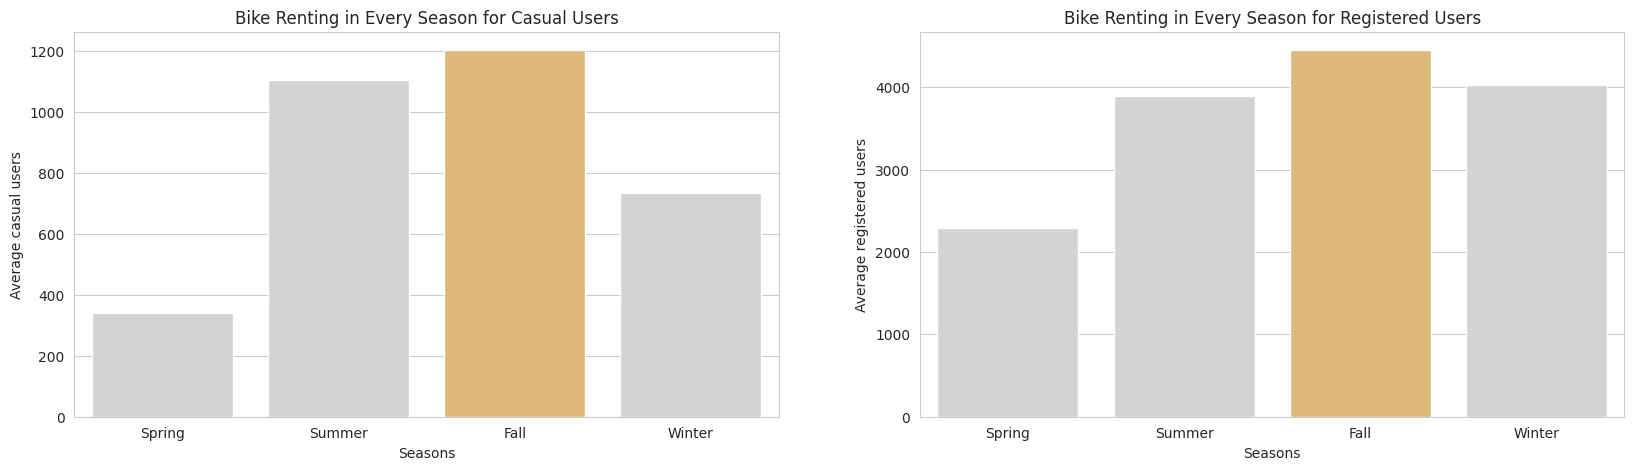

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

casualSeason= dayHour_df.groupby("season_day")["casual_day"].mean().reset_index().sort_values("casual_day")

registeredSeason= dayHour_df.groupby("season_day")["registered_day"].mean().reset_index().sort_values("registered_day")

# 1 spring
# 2 summer
# 3 fall
# 4 winter

sns.barplot(x="season_day", y="casual_day", data=casualSeason, palette=["#D3D3D3", "#D3D3D3", "#edbc6d", "#D3D3D3"], ax=ax[0], hue= "season_day", legend= False)
ax[0].set_xlabel("Seasons")
ax[0].set_ylabel("Average casual users")
ax[0].set_title("Bike Renting in Every Season for Casual Users", loc="center", fontsize=12)
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_xticklabels(["Spring", "Summer", "Fall", "Winter"], fontsize=10);

sns.barplot(x="season_day", y="registered_day", data=registeredSeason, palette=["#D3D3D3", "#D3D3D3", "#edbc6d", "#D3D3D3"], ax=ax[1], hue= "season_day", legend= False)
ax[1].set_xlabel("Seasons")
ax[1].set_ylabel("Average registered users")
ax[1].set_title("Bike Renting in Every Season for Registered Users", loc="center", fontsize=12)
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels(["Spring", "Summer", "Fall", "Winter"], fontsize=10);

- Penyewaan sepeda untuk pengguna kasual dan pengguna terdaftar lebih banyak terjadi pada musim gugur, dan paling sedikit saat musim semi.

# Pertanyaan 4: Bagaimana pengaruh cuaca dalam penyewaan sepeda? (antara casual users dengan registered users)

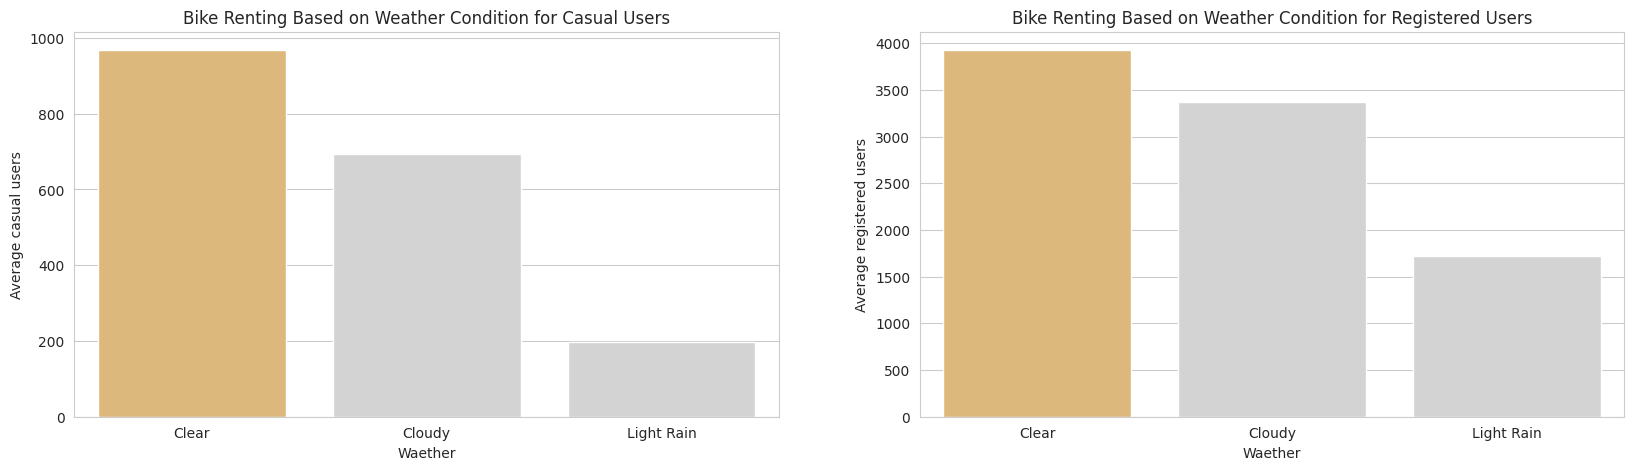

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

casualWeather= dayHour_df.groupby("weathersit_day")["casual_day"].mean().reset_index().sort_values("casual_day")

registeredWeather= dayHour_df.groupby("weathersit_day")["registered_day"].mean().reset_index().sort_values("registered_day")

# 1 clear/cuaca cerah
# 2 mist, cloudy/sedikit berawan
# 3 light snow, light rain/hujan ringan
# 4 heavy rain, ice pallets/hujan deras

sns.barplot(x="weathersit_day", y="casual_day", data=casualWeather, palette=["#edbc6d", "#D3D3D3", "#D3D3D3"], ax=ax[0], hue= "weathersit_day", legend= False)
ax[0].set_xlabel("Waether")
ax[0].set_ylabel("Average casual users")
ax[0].set_title("Bike Renting Based on Weather Condition for Casual Users", loc="center", fontsize=12)
ax[0].set_xticks([0, 1, 2])
ax[0].set_xticklabels(["Clear", "Cloudy", "Light Rain"], fontsize=10);

sns.barplot(x="weathersit_day", y="registered_day", data=registeredWeather, palette=["#edbc6d", "#D3D3D3", "#D3D3D3"], ax=ax[1], hue= "weathersit_day", legend= False)
ax[1].set_xlabel("Waether")
ax[1].set_ylabel("Average registered users")
ax[1].set_title("Bike Renting Based on Weather Condition for Registered Users", loc="center", fontsize=12)
ax[1].set_xticks([0, 1, 2])
ax[1].set_xticklabels(["Clear", "Cloudy", "Light Rain"], fontsize=10);

- Pengguna kasual dan pengguna terdaftar lebih banyak menyewa sepeda ketika cuaca cerah, dan lebih sedikit saat cuaca sedikit hujan.

## Analisis Lanjutan (Opsional)

## Conclusion

- terjadi peningkatan penyewaan sepeda yang signifikan pada pagi(jam 8) dan sore(jam 6)
- pengguna kasual lebih banyak menyewa sepeda pada akhir pekan/hari libur, sedangkan pengguna terdaftar lebih banyak menyewa sepeda pada hari kerja
- kebanyakan pengguna kasual dan pengguna terdaftar meminjam sepeda pada musim gugur,
 dan lebih sedikit di musim semi
- kebanyakan pengguna kasual dan pengguna terdaftar meminjam sepeda ketika cuaca cerah
